## Evaluacion 3
#### Proyecto de montaña rusas

__Integrantes:__

Santiago Perrotta,  CI: 31.014.123 <br>
Jesus Araujo,  CI: 31.200.562 <br>
Lai Chang,  CI: 30.335.078 <br>

### Lectura de los Datos

Descargar el framework flask: <br>

__pip install Flask__

In [10]:
import requests
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

# Procedemos a leer los datos de la API

# URLS de los datos de cada Ejercicio

# EJERCICIO 1 (Trazador Cubico Sujeto)
url_1 = "http://127.0.0.1:5000/api/data_e1"

# EJERCICIO 2 (Polinomios de Minimos Cuadrados)
url_2 = "http://127.0.0.1:5000/api/data_e2"

# EJERCICIO 4 (Resolucion de Ecuaciones)
url_4 = "http://127.0.0.1:5000/api/data_e4"


# Obtenemos los datos de cada ejercicio

# EJERCICIO 1 (Trazador Cubico Sujeto)
response = requests.get(url_1)
data = response.json()

datos1_x = np.array(data["x"])
datos1_y = np.array(data["y"])

# EJERCICIO 2 (Polinomios de Minimos Cuadrados)
response = requests.get(url_2)
data = response.json()

datos2_x = np.array(data["x"])
datos2_y = np.array(data["y"])

# EJERCICIO 4 (Resolucion de Ecuaciones)
response = requests.get(url_4)
data = response.json()

datos4_a = np.array(data["a"])
datos4_b = np.array(data["b"])

### Metodo de Trazador Cubico Sujeto

---

## Trazador Cúbico Sujeto: Método de Interpolación

El Trazador Cúbico Sujeto es un método de interpolación que utiliza polinomios cúbicos para aproximar una función suave y continua a partir de un conjunto de puntos de datos dados. Este método es útil en aplicaciones donde se requiere una transición suave entre los puntos, como en el diseño de trayectorias en ingeniería y gráficos por computadora.

### Pasos para realizar el Trazador Cúbico Sujeto:

#### Paso 1: Definición de Polinomios Cúbicos

Para \( n \) puntos de datos \((x_i, y_i)\), se definen \( n-1 \) polinomios cúbicos \( S_i(x) \) para cada intervalo \([x_i, x_{i+1}]\):

\[ S_i(x) = a_i + b_i (x - x_i) + c_i (x - x_i)^2 + d_i (x - x_i)^3 \]

#### Paso 2: Condiciones de Interpolación

Cada polinomio cúbico debe pasar por sus puntos extremos respectivos:

\[ S_i(x_i) = y_i \]
\[ S_i(x_{i+1}) = y_{i+1} \]

Esto establece \( 2(n-1) \) ecuaciones.

#### Paso 3: Continuidad de la Primera Derivada

La primera derivada de cada polinomio en \( x_{i+1} \) debe igualar la primera derivada del siguiente polinomio en el mismo punto:

\[ S_i'(x_{i+1}) = S_{i+1}'(x_{i+1}) \]

Esto proporciona \( n-2 \) ecuaciones adicionales.

#### Paso 4: Continuidad de la Segunda Derivada

La segunda derivada de cada polinomio en \( x_{i+1} \) debe igualar la segunda derivada del siguiente polinomio en el mismo punto:

\[ S_i''(x_{i+1}) = S_{i+1}''(x_{i+1}) \]

Esto añade otras \( n-2 \) ecuaciones.

#### Paso 5: Condiciones de Sujeción (Opcionales)

Se pueden aplicar condiciones específicas a las derivadas en los extremos del intervalo, como:

\[ S_0'(x_0) = f'(x_0) \]
\[ S_{n-1}'(x_n) = f'(x_n) \]

Estas condiciones de sujeción añaden 2 ecuaciones más.

#### Paso 6: Resolución del Sistema de Ecuaciones Lineales

Se forma un sistema de \( 4(n-1) \) ecuaciones lineales que incluye las condiciones de interpolación, continuidad de las derivadas y condiciones de sujeción. Este sistema se resuelve utilizando métodos de álgebra lineal para obtener los coeficientes \( a_i, b_i, c_i, d_i \) de cada polinomio cúbico.

#### Paso 7: Construcción de los Polinomios Cúbicos

Con los coeficientes obtenidos, se construyen los polinomios cúbicos \( S_i(x) \) para cada intervalo. Estos polinomios forman la curva interpolada que pasa suavemente a través de los puntos de datos.

### Resultado:

Se obtiene una curva continua y suave que garantiza una transición natural entre los segmentos interpolados, cumpliendo con las condiciones de suavidad, continuidad y derivabilidad requeridas.


---

Segmento 1: c0 = 0.5, c1 = 0.0, c2 = 0.5052631578947369, c3 = -0.20526315789473676
Segmento 2: c0 = 0.3789473684210518, c1 = 0.36315789473684434, c2 = 0.14210526315789251, c3 = -0.08421052631578867
Segmento 3: c0 = -3.031578947368393, c1 = 5.4789473684210055, c2 = -2.415789473684188, c3 = 0.3421052631578914
Segmento 4: c0 = 21.978947368420904, c1 = -19.53157894736828, c2 = 5.921052631578907, c3 = -0.5842105263157857
Segmento 5: c0 = -66.27368421052631, c1 = 46.6578947368421, c2 = -10.626315789473686, c3 = 0.7947368421052635


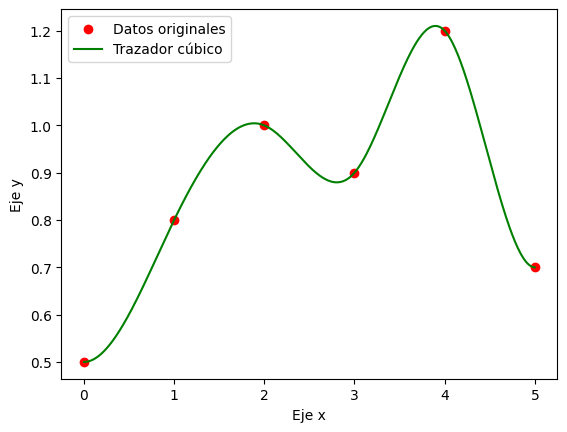

In [13]:

"""Funciones"""

#funcioonm para construir polinomio9
def polinomio(x, coef):
    return coef[0] + coef[1] * x + coef[2] * x**2 + coef[3] * x**3

#fucnion para construir la matriz a y el vector b del sistema de ecauciones
def sistema_ecuaciones(datos_x, datos_y):
    n = len(datos_x) - 1  #numero que se va a realizar entre los puntos de datos
    h = np.diff(datos_x)  #la distancia que ghay entre los puntos x consecutivos
    a = np.zeros((4 * n, 4 * n))  
    b = np.zeros(4 * n)  

    for i in range(n):
        xi = datos_x[i]  #el punto donde inicia el intervalo
        xi_1 = datos_x[i + 1]  #el punto donde termina el intervalo
        yi = datos_y[i]  #valor y correspondiente al punto inicial
        yi_1 = datos_y[i + 1]  #valor y correspondiente al punto final

        #puntos de interpolación para el polinomio cúbico en el intervalo [xi, xi_1]
        #primera fila del sistema de ecuaciones: S_i(xi) = yi
        a[2 * i, 4 * i:4 * i + 4] = [1, xi, xi**2, xi**3]
        
        #segunda fila del sistema de ecuaciones: S_i(xi_1) = yi_1
        a[2 * i + 1, 4 * i:4 * i + 4] = [1, xi_1, xi_1**2, xi_1**3]
        
        #lado derecho del sistema de ecuaciones: valores y correspondientes
        b[2 * i:2 * i + 2] = [yi, yi_1]

        if i < n - 1:
            #condiciones de continuidad de la primera derivada en xi_1
            # S_i'(xi_1) = S_{i+1}'(xi_1)
            a[2 * n + i, 4 * i:4 * i + 4] = [0, 1, 2 * xi_1, 3 * xi_1**2]
            a[2 * n + i, 4 * (i + 1):4 * (i + 1) + 4] = [0, -1, -2 * xi_1, -3 * xi_1**2]

            #condiciones de continuidad de la segunda derivada en xi_1
            # S_i''(xi_1) = S_{i+1}''(xi_1)
            a[3 * n - 1 + i, 4 * i:4 * i + 4] = [0, 0, 2, 6 * xi_1]
            a[3 * n - 1 + i, 4 * (i + 1):4 * (i + 1) + 4] = [0, 0, -2, -6 * xi_1]

    #condiciones de sujeción: derivadas en los extremos de todo el intervalo
    # S_0'(x_0) = f'(x_0)
    a[-2, :4] = [0, 1, 2 * datos_x[0], 3 * datos_x[0]**2]
    
    # S_{n-1}'(x_n) = f'(x_n)
    a[-1, -4:] = [0, 1, 2 * datos_x[-1], 3 * datos_x[-1]**2]
    
    return a, b


matriz_a, result_b = sistema_ecuaciones(datos1_x, datos1_y)

solucion = np.linalg.solve(matriz_a, result_b)

#Se imprmjimen los valores en consola
for i in range(0, len(solucion), 4):
    print(f"Segmento {i // 4 + 1}: c0 = {solucion[i]}, c1 = {solucion[i+1]}, c2 = {solucion[i+2]}, c3 = {solucion[i+3]}")

#se grafican los valores para graficar la curva ajustada
x_range = np.linspace(min(datos1_x), max(datos1_x), 500)
y_range = np.zeros_like(x_range)

#se construye la curva evaluando el polinomio en los segmentos
for i in range(len(x_range)):
    xi = x_range[i]
    segmento = min(max(np.searchsorted(datos1_x, xi) - 1, 0), len(datos1_x) - 2)
    c = solucion[4 * segmento:4 * segmento + 4]
    y_range[i] = polinomio(xi, c)

#se grafican los puntos originales y la curva ajustada
fig, ax = plt.subplots()

ax.scatter(datos1_x, datos1_y, color='red', label="Datos originales")
ax.plot(x_range, y_range, color='green', label="Trazador cúbico")

ax.set_xlabel("Eje x")
ax.set_ylabel("Eje y")
ax.legend()
plt.show()


### Polinomio de Minimos Cuadrados

Es una funcion polinomica que se ajusta a un conjunto de datos experimentales utilizando el metodo de <br>
minimos cuadrados.


Dado un conjunto de datos (x1,yi), queremos encontrar un polinomio de grado (m) que minimice <br>
la suma de los errores cuadrados entre los valores observados (yi) y los valores predichos <br>
por el polinomio.
<br>

__Pasos para realizar el Polinomio:__

__Paso 1:__ <br>
<br>
Formula del polinomio:
<br>
Pn(x) = c0 + c1x + c2x^2 + ... + cmx^m

__Paso 2:__ <br>
<br>
Minimizamos la funcion de error:
<br>
E = Ʃ(yi - Pn(xi))^2

__Paso 3:__ <br>
<br>
se deriva respecto a cada coeficiente, por ejemplo si tenemos 3 coeficientes <br>

dE/da0 = -2Ʃ (yi - c0 - c1x - c2x^2)

dE/da1 = -2Ʃ xi(yi - c0 - c1x - c2x^2)

dE/da2 = -2Ʃ xi^2(yi - c0 - c1x - c2x^2)

__Paso 4:__ <br>
<br>

Se busca el minimo de cada sumatoria, igualamdo a cero la derivada y reordenando, <br>
se obtiene el conjunto de ecuaciones:

c0(n) + c1 Ʃxi + c2 Ʃxi^2 = Ʃyi

c0 Ʃxi + c1 Ʃxi^2 + c2 Ʃxi^3 = Ʃxiyi

c0 Ʃxi^2 + c1 Ʃxi^3 + c2 Ʃxi^4 = Ʃxi^2yi

con incognitas c0, c1 y c2, cuyos coeficientes se pueden <br>
evaluar con los puntos observados. Simplemente se resuelve <br>
el sistema de ecuaciones para obtener los valores de los <br>
coeficientes c0, c1 y c2

__Paso 5:__

Esta forma que se va a mostrar acontinuacion, es una forma <br>
de realizar el ejercicio y asi ahorrarme hacer tantas derivadas <br>
como incognitas haya. 

<br>
Esta es una formula para saltarnos el paso 3 y obtener de una vez <br>
el sistema de ecuaciones a resolver.

n = cantidad de datos

c0          c1        c2            cm       
(n)         Ʃxi      Ʃxi^2   ....   Ʃxi^m        = Ʃyi
Ʃxi        Ʃxi^2     Ʃxi^3   ....   Ʃxi^m+1      = Ʃxiyi
Ʃxi^2      Ʃxi^3     Ʃxi^4   ....   Ʃxi^m+2      = Ʃxi^2yi
....       ....      ....    ....    ....        =  .....
Ʃxi^m     Ʃxi^m+1   Ʃxi^m+2  ....   Ʃxi^2m       = Ʃxi^myi

In [15]:
# funcion para construir el polinomio
def polinomio(grado,x,coef):

    px = 0 

    for i in range(grado+1):
        if i == 0:
            px += coef[i]
        else:
            px += coef[i]*(x**i)

    return px


# funcion para calcular la suma de potencias de los xi
def potencias_x(lista,exponente):

    potencia = np.zeros((len(lista)))
    resultado = 0

    # ciclo para sacar las potencias de los xi
    for i in range(len(lista)):
        potencia[i] = lista[i]**exponente

    # funcion sum para la sumatoria de la lista de potencias
    resultado = np.sum(potencia)

    return resultado


# funciom para calcula las suma de la multiplicacion de (xi^n)*yi
def multiplicacion_xiyi(lista_x,lista_y,exponente):

    potencia_x = np.zeros((len(lista_x)))
    multiplicacion = np.zeros(len(lista_x))
    resultado = 0

    if exponente != 0:

        # ciclo para calcular la potencia de xi
        for i in range(len(lista_x)):
            potencia_x[i] = lista_x[i]**exponente

        #ciclo para calcular la multiplicacion
        for j in range(len(lista_x)):
            multiplicacion[j] = lista_y[j] * potencia_x[j]

        # funcion sum para la sumatoria de la lista de multiplicacion
        resultado = np.sum(multiplicacion)

    else:
        resultado = np.sum(lista_y)

    return resultado

# funcion para construir la matriz y hallar los valores de los coeficientes
def sistema_ecuaciones(datos_x,datos_y,grado):
    
    a = np.zeros((grado+1,grado+1))
    b = np.zeros((grado+1))

    for i in range(grado+1):
        exponente_a = i
        exponente_b = i
        for j in range(grado+1):
            if i == 0 and j == 0:
                a[i][j] = len(datos_x)
                exponente_a += 1
            else:
                a[i][j] = potencias_x(datos_x,exponente_a)
                exponente_a += 1
        b[i] = multiplicacion_xiyi(datos_x,datos_y,exponente_b)

    return a,b
        

coeficiente c0 = 1.212857142857133
coeficiente c1 = 2.9559523809524233
coeficiente c2 = -1.3285714285714567
coeficiente c3 = 0.20833333333333795


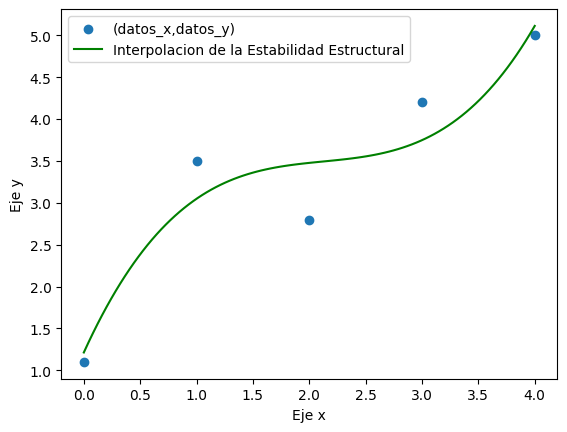

In [16]:

# indicamos el grado del polinomio
grado_pol = 3
x = sy.Symbol('x') # declaramos una incognita


# obtenemos la matriz con las incognitas
matriz_a, result_b = sistema_ecuaciones(datos2_x,datos2_y,grado_pol)


# resolvemos el sistema de ecuaciones
solucion = np.linalg.solve(matriz_a,result_b)

# imprimimos los valores de los coeficientes
for i in range(len(solucion)):
    print("coeficiente c" + str(i) + " = " + str(solucion[i]))

# valores para graficar la curva ajustada
x_range = np.linspace(0,4,100)
y_range = np.zeros(100)

# ciclo para obtener los valores de y, evaluandolos en el polinomio
for i in range(100):
    valor = polinomio(grado_pol,x_range[i],solucion)
    y_range[i] = valor

# graficamos los puntos originales
fig, ax = plt.subplots()

ax.scatter(datos2_x, datos2_y, label="(datos_x,datos_y)")

# Configurar los ejes
ax.set_xlabel("Eje x")
ax.set_ylabel("Eje y")

ax.plot(x_range, y_range, color = "green",label="Interpolacion de la Estabilidad Estructural")


# Mostrar la leyenda y mostrar la gráfica
ax.legend()
plt.show()

### Polinomios Ortogonales


Los polinomios ortogonales son un conjunto especial de polinomios que tienen propiedades matemáticas únicas que los hacen útiles en diversas áreas de las matemáticas, la física y la ingeniería.

#### Aplicaciones:

Los polinomios ortogonales tienen una amplia gama de aplicaciones en diversas áreas, incluyendo:

- Aproximación de funciones: Los polinomios ortogonales se pueden utilizar para aproximar funciones continuas con alta precisión.
- Integración numérica: Las fórmulas de integración numérica basadas en polinomios ortogonales son eficientes y precisas.
- Ecuaciones diferenciales: Los polinomios ortogonales se utilizan en la solución de ecuaciones diferenciales, particularmente en problemas de Sturm-Liouville.
- Mecánica cuántica: Los polinomios ortogonales juegan un papel fundamental en la mecánica cuántica, donde se utilizan para describir los estados de energía de los sistemas cuánticos.
- Procesamiento de señales: Los polinomios ortogonales se utilizan en diversas aplicaciones de procesamiento de señales, como el filtrado y la compresión de datos.

Para mas informacion sobre el tema revisar el siguiente link: https://www.um.es/documents/118351/1884002/TFG_SANCHEZ+SALAS.pdf/0a3a3e79-5717-4aea-91ff-a3881edb4bbe 

In [17]:
def legendre_polinomio(n): #Devuelve polinomio legendre
    x = sy.symbols('x')  # Definir una variable 
    return sy.legendre(n, x)  # Generar el polinomio de Legendre de grado n

def ajustes_legendre(x_data, y_data, angulo): 
    """
    Ajusta los datos (x_data, y_data) usando una combinación de polinomios de Legendre de grado especificado.
    
    Parametros:
    x_data (array-like): Datos en el eje x.
    y_data (array-like): Datos en el eje y.
    angulo (int): Grado del polinomio de Legendre.
    
    Returns:
    *Función ajustada.
    *Coeficientes de los polinomios de Legendre ajustados.
    """
    x = sy.symbols('x')  # Definir una variable simbólica x
    
    # Generar polinomios de Legendre hasta el grado especificado
    polinomio = [legendre_polinomio(n) for n in range(angulo + 1)] #lista comprimida
    
    # Construir la matriz del sistema de ecuaciones para ajustar los coeficientes
    A = np.zeros((len(x_data), angulo + 1))  # Inicializar la matriz A con ceros
    for i, poly in enumerate(polinomio):
        f = sy.lambdify(x, poly, 'numpy')  # Convertir el polinomio simbólico en una función numérica
        A[:, i] = f(x_data)  # Evaluar el polinomio en los puntos de x_data
    
    # Resolver el sistema lineal utilizando mínimos cuadrados 
    coeffs, _, _, _ = np.linalg.lstsq(A, y_data, rcond=None)
    
    # Construir la función ajustada combinando los polinomios con sus coeficientes
    construir_funcion = sum(c * poly for c, poly in zip(coeffs, polinomio))
    
    return construir_funcion, coeffs


Funcion Ajustada: -0.0233333333333603*x**5 + 0.270833333333623*x**4 - 1.07500000000115*x**3 + 1.62916666666889*x**2 - 0.501666666668915*x + 0.500000000001693
Coeficientes: [ 1.09722222 -1.15666667  1.24087302 -0.44037037  0.06190476 -0.00296296]


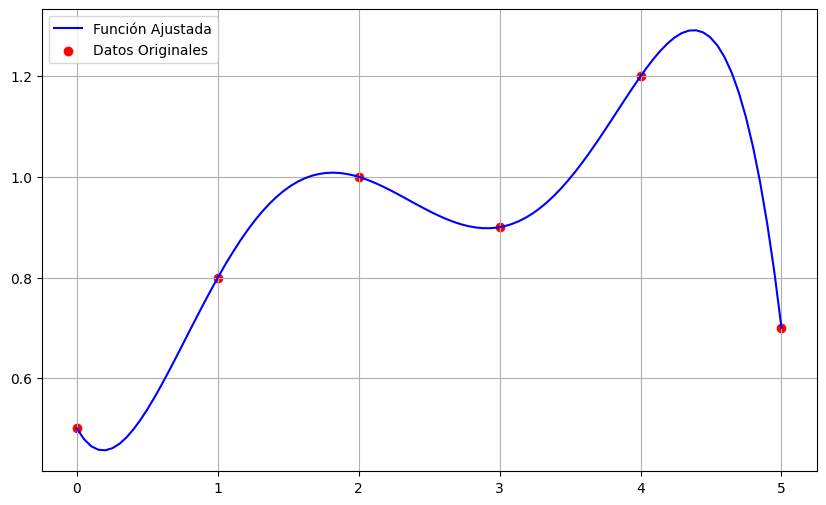

In [18]:
x_data = datos1_x  #datos API
y_data = datos1_y  #datos API
funcion, coeffs = ajustes_legendre(x_data, y_data, 5) #funcion ajustada
print(f"Funcion Ajustada: {funcion}")
print(f"Coeficientes: {coeffs}")

x = sy.symbols('x')
#funcion numerica a partir de ajustada
funcion_numerica = sy.lambdify(x, funcion, 'numpy')
#rangos
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = funcion_numerica(x_plot)
#grafica
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Función Ajustada', color='blue')  # Graficar la función
plt.scatter(x_data, y_data, label='Datos Originales', color='red') #puntos
plt.grid(True)
plt.legend()

### Resolucion de Ecuaciones

La ecuaciones lineales son igualdades matematicas que involucran expresiones <br>
algebraicas con variables y constantes, y se caracterizan por producir graficas de <br>
lineas rectas en el plano cartesiano

Datos del ejercicio: <br>

datos_a = np.array([[1,2,1],[2,-1,1],[3,1,-1]]) <br>
datos_b = np.array([4,1,-2])

En este ejercicio vamos a resolver un sistema de ecuaciones de 3 incognitas <br>

__Paso 1:__ <br>

Vamos a usar la libreria sympy para declarar 3 incognitas

__Paso 2:__ <br>

Luego usamos la funcion Eq de sympy para separar cada ecuacion que tengamos

__Paso 3:__ <br>

Usamos la funcion solve de sympy para resolver la ecuacion lineal

La solución para la variable x0 es: -1/5
La solución para la variable x1 es: 14/15
La solución para la variable x2 es: 7/3


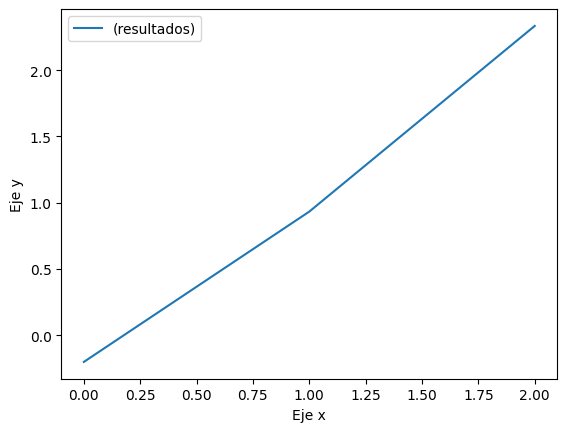

In [19]:

# definimos el numero de incognitas
nro_incognitas = len(datos4_a)

lista_incognitas = []


# funcion para generar las incognitas
def incognitas(nro_incognitas,lista_incognitas):

    for i in range(nro_incognitas):
        x = sy.Symbol("x" + str(i))
        lista_incognitas.append(x)


# funcion para generar las ecuaciones
def generar_ecuaciones(lista_incognitas,datos_a,datos_b):

    lista_ec = []

    if nro_incognitas == len(datos_b):

        for f in range(nro_incognitas):
            ec = 0
            for c in range(nro_incognitas):
                ec += datos_a[f][c]*lista_incognitas[c]

            lista_ec.append(sy.Eq((ec),datos_b[f]))
    else:
        return None
    
    return lista_ec


# generamos las incognitas
incognitas(nro_incognitas,lista_incognitas)

# generamos las ecuaciones
ecuaciones = generar_ecuaciones(lista_incognitas,datos4_a,datos4_b)

# resolvemos las ecuaciones
solucion = sy.solve(ecuaciones, dict=True)

# Imprimir la solución
vector_solucion = []
for variable, resultado in solucion[0].items():
    print(f"La solución para la variable {variable} es: {resultado}")
    vector_solucion.append(resultado)

# graficamos los puntos originales
fig, ax = plt.subplots()

ax.plot(vector_solucion, label="(resultados)")

# Configurar los ejes
ax.set_xlabel("Eje x")
ax.set_ylabel("Eje y")

# Mostrar la leyenda y mostrar la gráfica
ax.legend()
plt.show()

La solución para la variable x0 es: -1/5
La solución para la variable x1 es: 14/15
La solución para la variable x2 es: 7/3


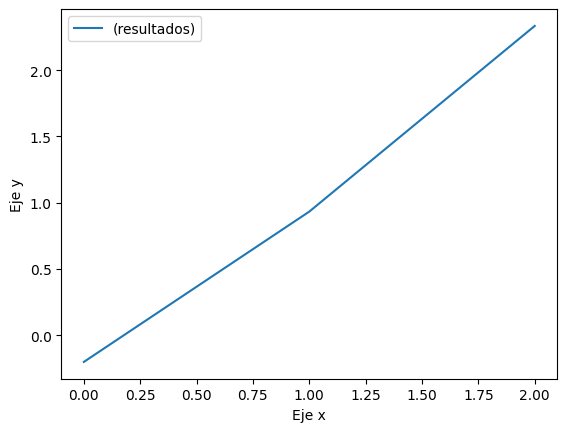

In [ ]:

# definimos el numero de incognitas
nro_incognitas = len(datos4_a)

lista_incognitas = []


# funcion para generar las incognitas
def incognitas(nro_incognitas,lista_incognitas):

    for i in range(nro_incognitas):
        x = sy.Symbol("x" + str(i))
        lista_incognitas.append(x)


# funcion para generar las ecuaciones
def generar_ecuaciones(lista_incognitas,datos_a,datos_b):

    lista_ec = []

    if nro_incognitas == len(datos_b):

        for f in range(nro_incognitas):
            ec = 0
            for c in range(nro_incognitas):
                ec += datos_a[f][c]*lista_incognitas[c]

            lista_ec.append(sy.Eq((ec),datos_b[f]))
    else:
        return None
    
    return lista_ec


# generamos las incognitas
incognitas(nro_incognitas,lista_incognitas)

# generamos las ecuaciones
ecuaciones = generar_ecuaciones(lista_incognitas,datos4_a,datos4_b)

# resolvemos las ecuaciones
solucion = sy.solve(ecuaciones, dict=True)

# Imprimir la solución
vector_solucion = []
for variable, resultado in solucion[0].items():
    print(f"La solución para la variable {variable} es: {resultado}")
    vector_solucion.append(resultado)

# graficamos los puntos originales
fig, ax = plt.subplots()

ax.plot(vector_solucion, label="(resultados)")

# Configurar los ejes
ax.set_xlabel("Eje x")
ax.set_ylabel("Eje y")

# Mostrar la leyenda y mostrar la gráfica
ax.legend()
plt.show()